<a href="https://colab.research.google.com/github/sukjin1/ed/blob/main/svm_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ai-times.tistory.com/418

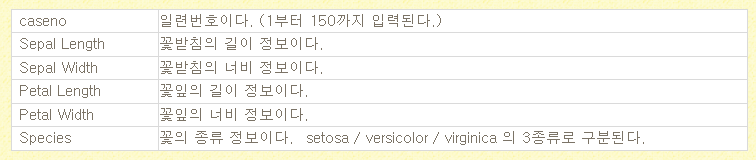


X = iris.data[:, [2, 3]] # ????? <br>
X[y == 0, 0]#????

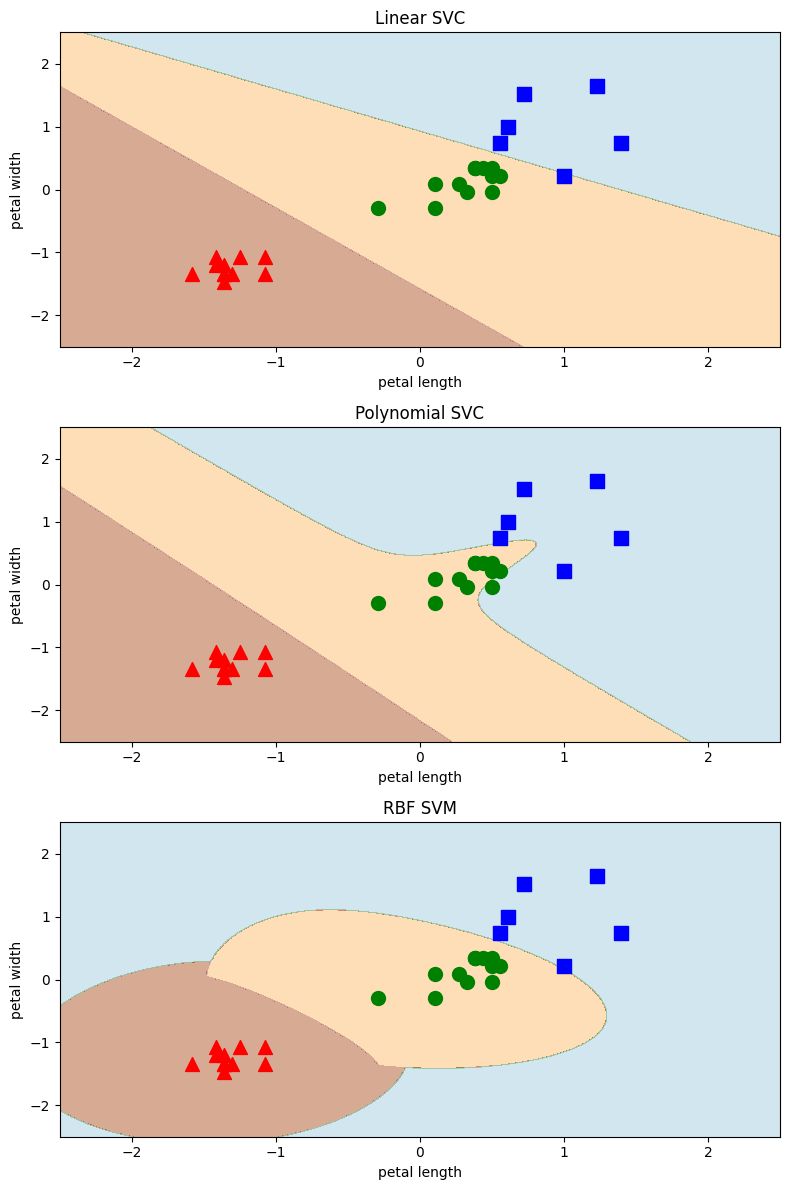

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

iris = load_iris()
X = iris.data[:, [2, 3]] # ?????
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100) #????
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("petal length")#꽃잎의 길이
    plt.ylabel("petal width")#꽃잎의 폭
    plt.title(title)


# model1 = SVC(kernel='linear').fit(X_test_std, y_test)
# model2 = SVC(kernel='poly', random_state=0,
#              gamma=10, C=1.0).fit(X_test_std, y_test)
# model3 = SVC(kernel='rbf', random_state=0, gamma=1,
#              C=1.0).fit(X_test_std, y_test)
model1 = SVC(kernel='linear').fit(X_train_std, y_train)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_train_std, y_train)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_train_std, y_train)

plt.figure(figsize=(8, 12))
plt.subplot(311) #???
plot_iris(X_test_std, y_test, model1, "Linear SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "Polynomial SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF SVM")
plt.tight_layout()
plt.show()

In [ ]:
X_train_std.shape

(120, 2)

In [ ]:
X_test_std.shape

(30, 2)


C와 감마를 변화시켜 보면?

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#model.predict(np.array([XX.ravel(), YY.ravel()]).T)
y1_pred = model1.predict(X_test_std)

confusion_matrix(y_test, y1_pred)
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
X_test_std.shape

(30, 2)

In [ ]:
X_test_std.ravel().shape

(60,)

In [ ]:
y_test.ravel().shape

(30,)

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

iris = load_iris()
X = iris.data[:, :] # ?????
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



# model1 = SVC(kernel='linear').fit(X_test_std, y_test)
# model2 = SVC(kernel='poly', random_state=0,
#              gamma=10, C=1.0).fit(X_test_std, y_test)
# model3 = SVC(kernel='rbf', random_state=0, gamma=1,
#              C=1.0).fit(X_test_std, y_test)
model1 = SVC(kernel='linear').fit(X_train_std, y_train)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_train_std, y_train)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_train_std, y_train)

# plt.figure(figsize=(8, 12))
# plt.subplot(311) #???
# plot_iris(X_test_std, y_test, model1, "Linear SVC")
# plt.subplot(312)
# plot_iris(X_test_std, y_test, model2, "Polynomial SVC")
# plt.subplot(313)
# plot_iris(X_test_std, y_test, model3, "RBF SVM")
# plt.tight_layout()
# plt.show()

y1_pred = model1.predict(X_test_std)

confusion_matrix(y_test, y1_pred)
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



NB와 비교